# 8. Плохо обусловленные матрицы
Провести серию экспериментов, тестирующую команды scipy.linalg.solve, numpy.linalg.cond на плохо обусловленных матрицах вида A=LU, где L, U - случайные нижняя треугольная и верхняя треугольная матрицы соответственно с малыми диагональными элементами.

Сначала импортируем нужные нам библиотеки

In [377]:
from scipy.linalg import solve
from numpy.linalg import cond, norm
import numpy as np
import matplotlib.pyplot as plt
import time

Переменная mal - задает порядок малости диагональных элементов.
cond_4_graf - список чисел обусловленности
perc_cond - список, в котором хранятся результаты проверки на >10^16.
t_cond - список, в котором хранится время выполнения функции numpy.linalg.cond
nevyazka - список невязок
otn_osh_resh - тут хранится список относительных ошибок решения

In [378]:
mal=10
cond_4_graf=[]
perc_cond=[]
t_cond=[]
nevyazka=[]
otn_oshibk_resh=[]

для матриц порядка от 1 до 9 проведем исследование.
Будем создавать случайные треугольные матрицы u,l. Диагональные элементы должны быть малыми, поэтому случайно сгенерированные диагональные элементы разделим на некую величину. Далее получим матрицу a как произведение матриц l и u (a=l.dot(u)). Далее оценивается время работы numpy.linalg.cond и порядок числа обусловленности.
Формируется вектор b на основе соотношения Ax=b (b=a.dot(x)), где x - рандомно сгенерированный вектор. 

In [379]:
for n in range(1, 10):
    u=np.triu(np.random.rand(n, n))
    l=np.tril(np.random.rand(n, n))
    for i in range(n):
        u[i][i]/=mal
        l[i][i]/=mal
    a=l.dot(u)
    
    #замеряем время работы numpy.linalg.cond
    f_time = time.time()
    for i in range(10000):
        cond_a=cond(a)
    t_time=time.time()-f_time
    t_cond.append(t_time)
    
    #Тут оцениваем порядок числа обусловленности
    if cond_a>10**16:
        perc_cond.append("{} - Превосходит".format(n))
    else:
        perc_cond.append("{} - Не превосходит".format(n))    
    cond_4_graf.append(cond_a)
    #print(cond_a) #Число обусловленности 
    
    #Задаём решение - x
    x=np.random.rand(n)
    b=a.dot(x)
    x1=solve(a,b)
    norm_nevyazka=norm(x1-x)
    nevyazka.append(norm_nevyazka)
    norm_otnositl=norm_nevyazka/norm(x)
    otn_oshibk_resh.append(norm_otnositl)    

<ipython-input-379-89c1ad76205c>:27: LinAlgWarning: Ill-conditioned matrix (rcond=1.14144e-18): result may not be accurate.
  x1=solve(a,b)
<ipython-input-379-89c1ad76205c>:27: LinAlgWarning: Ill-conditioned matrix (rcond=8.02695e-18): result may not be accurate.
  x1=solve(a,b)
<ipython-input-379-89c1ad76205c>:27: LinAlgWarning: Ill-conditioned matrix (rcond=1.01765e-18): result may not be accurate.
  x1=solve(a,b)


Оценка превосходства числа 10^16

In [380]:
print(perc_cond)

['1 - Не превосходит', '2 - Не превосходит', '3 - Не превосходит', '4 - Не превосходит', '5 - Не превосходит', '6 - Превосходит', '7 - Не превосходит', '8 - Превосходит', '9 - Превосходит']


Text(0.5, 1.0, 'Condition')

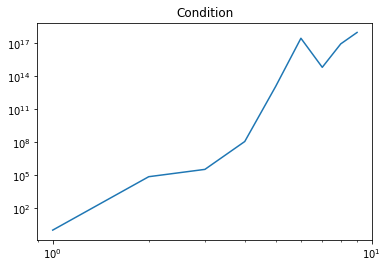

In [381]:
n_x=list(range(1,10))
plt.loglog(n_x, cond_4_graf)
plt.title('Condition')

Строится график зависимости Время выполнения функции numpy.linalg.cond - порядок матрицы. Как видим зависимость тут скорее линейная.

Text(0.5, 1.0, 'timeplot')

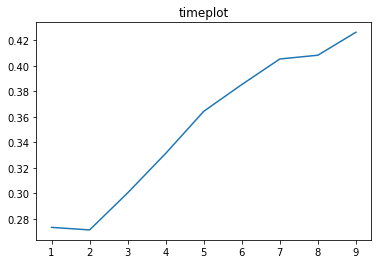

In [382]:
plt.plot(n_x, t_cond)
plt.title('timeplot')

Строится функция невязки. Используется двойная логарифмическая шкала, график представляет собой скорее прямую линию => Невязка - показательная функция относительно порядка матрицы.

Text(0.5, 1.0, 'Невязка')

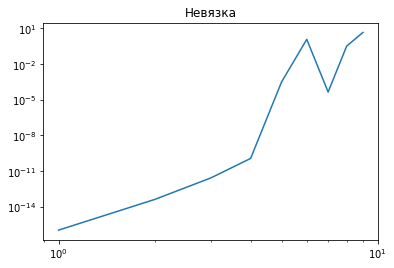

In [383]:
plt.loglog(n_x, nevyazka)
plt.title('Невязка')

Строится график относительной ошибки решения. Используется двойная логарифмическая шкала, график представляет собой скорее прямую линию => Относительная ошибка решения - показательная функция относительно порядка матрицы.

Text(0.5, 1.0, 'Относительная ошибка решения')

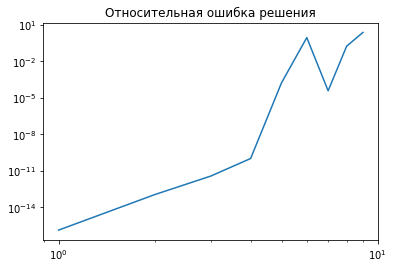

In [384]:
plt.loglog(n_x, otn_oshibk_resh)
plt.title('Относительная ошибка решения')